# Analyzing data for pion decays
pionDecaysScan.csv contains the data from a micromegas scan over $\Delta m = m_{H^+} - m_{H^0}$

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (13,8)
# Reading data
df = pd.read_csv("./pionDecayScan.csv", sep=';')
df

,deltaM,channel,partialWidth,fpi
0,0.10,"~H+ -> u,D,~X",3.943500e-18,0
1,0.10,"~H+ -> ne,E,~X",1.452700e-18,0
2,0.10,"~H+ -> u,D,~X",3.943500e-18,1
3,0.10,"~H+ -> ne,E,~X",1.452700e-18,1
4,0.10,total,5.396200e-18,-1
...,...,...,...,...
2266,9.95,"~H+ -> nm,M,~H3",1.319200e-08,0
2267,9.95,"~H+ -> nl,L,~X",1.189600e-08,0
2268,9.95,"~H+ -> nl,L,~H3",1.127700e-08,0
2269,9.95,"~H+ -> ~X,pi+",3.477200e-10,1


In [49]:
DM = df.deltaM.unique()
# sum of all decays with pion switch on
pi = [df.loc[(df['deltaM'] == dm) & (df['fpi'] == 1), 'partialWidth'].sum() for dm in DM]
# sum of all decays with pion switch off
ff = [df.loc[(df['deltaM'] == dm) & (df['fpi'] == 0), 'partialWidth'].sum() for dm in DM]
# sum of quark decays
qq = [df.loc[(df['deltaM'] == dm) & (df.channel.str.contains('u|c')), 'partialWidth'].sum() for dm in DM]
# sum of lepton decays
ll = [df.loc[(df['deltaM'] == dm) & (df.channel.str.contains('E|M|L')), 'partialWidth'].sum() for dm in DM]
# sum of leptons + pions
llpi = [sum(z) for z in zip(ll, pi)]
# total width with pion switch at 1.5 GeV
switch = df[df['fpi'] == -1]

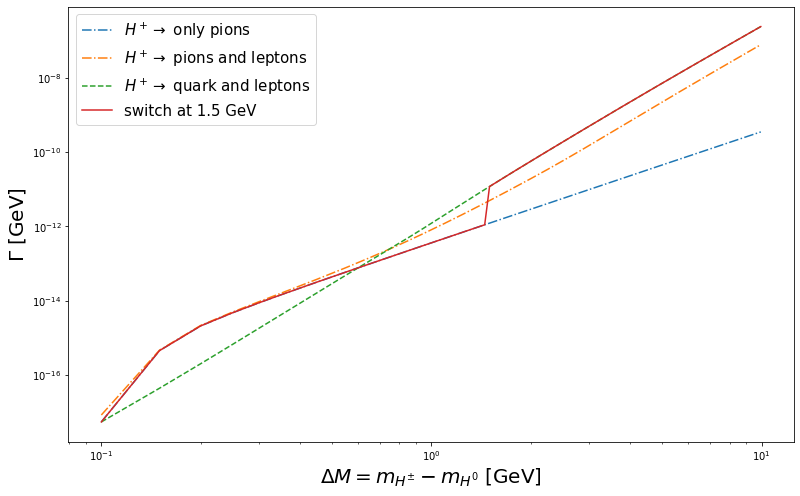

In [50]:
plt.ylabel(r'$\Gamma$ [GeV]',fontsize=20)
plt.xlabel(r'$\Delta M = m_{H^{\pm}} - m_{H^0}$ [GeV]',fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.plot(DM, pi, label=r'$H^+ \rightarrow$ only pions', linestyle='-.')
plt.plot(DM, llpi, label=r'$H^+ \rightarrow$ pions and leptons', linestyle='-.')
plt.plot(DM, ff, label=r"$H^+ \rightarrow$ quark and leptons", linestyle='dashed')
plt.plot(DM, switch['partialWidth'], label=r'switch at 1.5 GeV')
plt.legend(fontsize=15)
plt.savefig('pionDecays.png')
plt.show()

# Detailed decays

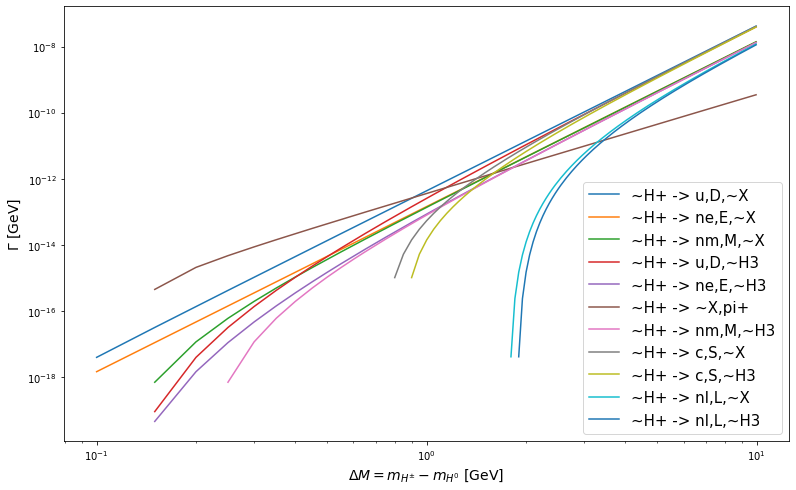

In [51]:
plt.ylabel(r'$\Gamma$ [GeV]',fontsize=14)
plt.xlabel(r'$\Delta M = m_{H^{\pm}} - m_{H^0}$ [GeV]',fontsize=14)
plt.yscale('log')
plt.xscale('log')
channels = df[ ~(df['channel'] == 'total') ].channel.unique()
for ch in channels:
    dfCh = df[df['channel'] == ch]
    plt.plot(dfCh['deltaM'], dfCh['partialWidth'], label=ch)
plt.legend(fontsize=15)
plt.show()